In [ ]:
#import libraries

In [ ]:
import requests
import matplotlib as plt
import pandas as pd

In [ ]:
# URL of the SQLite database file

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

In [ ]:
# Path to save the downloaded file

In [ ]:
file_path = r"D:\beka\pro1\datascience\IBM DATA ANALYST CAPSTONE PROJECT\m4_survey_data.sqlite"

In [ ]:
# Download the file

In [ ]:
response = requests.get(url)
with open(file_path, 'wb') as f:
    f.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [ ]:
# Connect to the database

In [ ]:
import sqlite3

In [ ]:
# Create a connection to the database

In [ ]:
conn = sqlite3.connect(file_path)

In [ ]:
# Create a cursor object to execute SQL queries

In [ ]:
cursor = conn.cursor()

In [ ]:
# Check if the connection is successful by querying the SQLite database

In [ ]:
# query the names of all tables in the database

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
Containers
SOVisitTo
SONewContent
Gender
Sexuality
Ethnicity
master


In [ ]:
query = "SELECT ConvertedComp FROM master WHERE ConvertedComp IS NOT NULL;"
df = pd.read_sql_query(query, conn)

In [ ]:
df = pd.read_sql_query(query, conn)

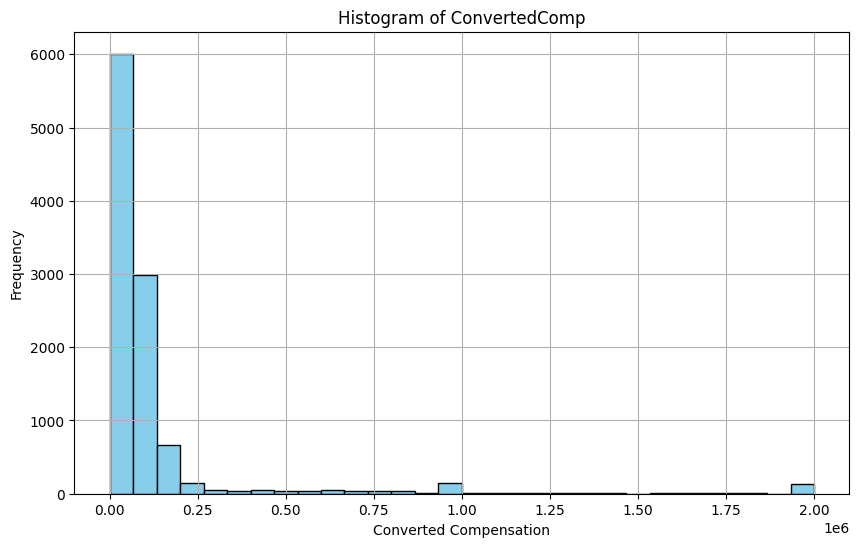

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
### Box Plots

In [ ]:
#Plot a box plot of `Age.`

In [ ]:
query = "SELECT Age FROM master WHERE Age IS NOT NULL;"
df = pd.read_sql_query(query, conn)

In [ ]:
df = pd.read_sql_query(query, conn)

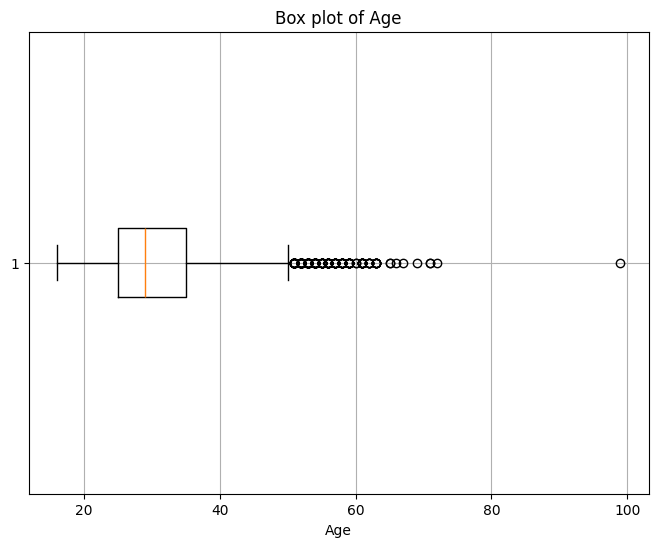

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [ ]:
### Scatter Plots

In [ ]:
#Create a scatter plot of `Age` and `WorkWeekHrs.`

In [ ]:
query = "SELECT Age, WorkWeekHrs FROM master WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL;"
df = pd.read_sql_query(query, conn)

In [ ]:
df = pd.read_sql_query(query, conn)

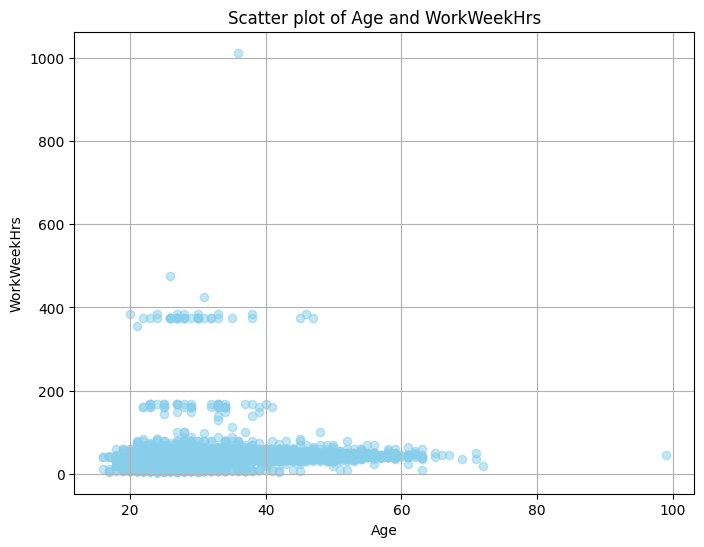

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], color='skyblue', alpha=0.5)
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()

In [ ]:
### Bubble Plots

In [ ]:
# Query the data for the WorkWeekHrs, CodeRevHrs, and Age columns from the master table

In [ ]:
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age IS NOT NULL;"
df = pd.read_sql_query(query, conn)

In [ ]:
# Define bubble size based on Age column

In [ ]:
bubble_size = df['Age']

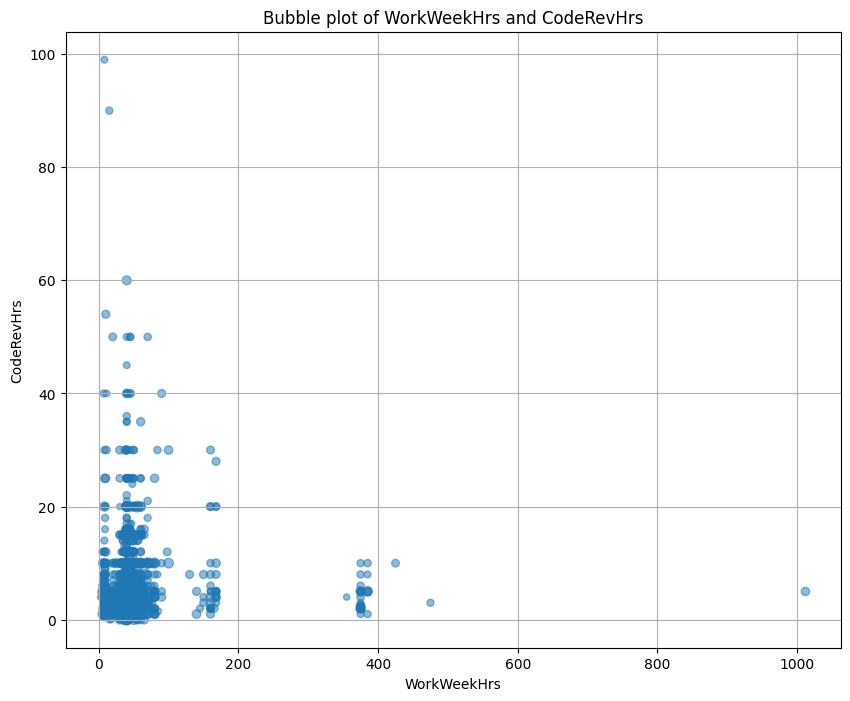

In [ ]:
# Plot the bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5)
plt.title('Bubble plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.show()

In [ ]:
### Pie Charts
#Create a pie chart of the top 5 databases that 
# respondents wish to learn next year. Label the pie
# chart with database names. Display percentages 
# of each database on the pie chart.

In [ ]:
query = """
SELECT DatabaseDesireNextYear AS DatabaseName, COUNT(*) AS Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5;
"""

df = pd.read_sql_query(query, conn)
print(df)

    DatabaseName  Count
0     PostgreSQL   4328
1        MongoDB   3649
2          Redis   3331
3          MySQL   3281
4  Elasticsearch   2856


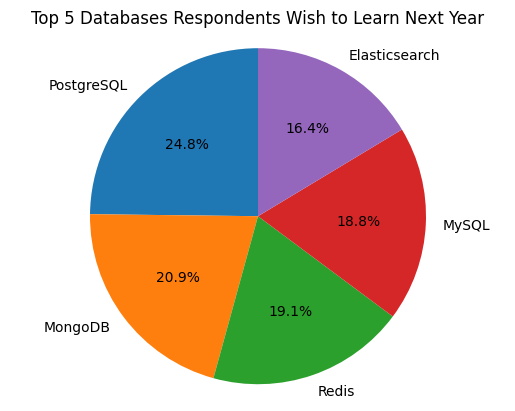

In [ ]:
# Use the DataFrame to create a pie chart
fig, ax = plt.subplots()
ax.pie(df['Count'], labels=df['DatabaseName'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

In [ ]:
### Stacked Charts

In [ ]:
query = """
SELECT Age, 
       AVG(WorkWeekHrs) AS MedianWorkWeekHrs,  -- This is actually the average, not the median
       AVG(CodeRevHrs) AS MedianCodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
ORDER BY Age;
"""

df = pd.read_sql_query(query, conn)
print(df)

    Age  MedianWorkWeekHrs  MedianCodeRevHrs
0  30.0          43.131579          4.696858
1  31.0          41.602746          4.701923
2  32.0          42.650207          5.008557
3  33.0          44.486952          4.724311
4  34.0          43.147583          4.869902
5  35.0          42.451550          4.745130


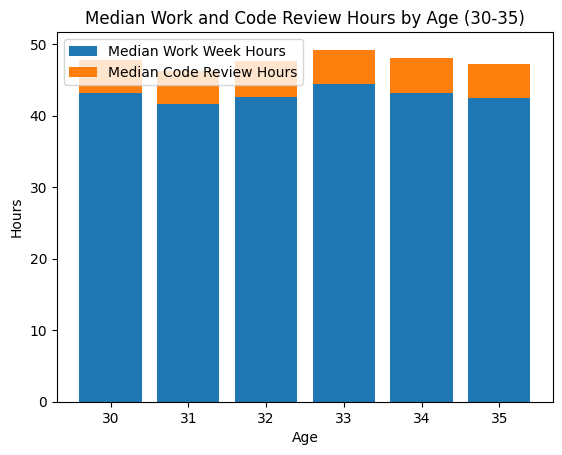

In [ ]:
fig, ax = plt.subplots()

# Stacking 'MedianCodeRevHrs' on top of 'MedianWorkWeekHrs'
ax.bar(df['Age'], df['MedianWorkWeekHrs'], label='Median Work Week Hours')
ax.bar(df['Age'], df['MedianCodeRevHrs'], bottom=df['MedianWorkWeekHrs'], label='Median Code Review Hours')

# Adding labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Hours')
ax.set_title('Median Work and Code Review Hours by Age (30-35)')
ax.legend()
plt.show()

In [ ]:
### Line Chart

In [ ]:
query = """
SELECT Age, 
       AVG(ConvertedComp) AS MedianConvertedComp
FROM (
    SELECT Age, 
           ConvertedComp,
           ROW_NUMBER() OVER (PARTITION BY Age ORDER BY ConvertedComp) AS rn,
           COUNT(*) OVER (PARTITION BY Age) AS cnt
    FROM master
    WHERE Age BETWEEN 45 AND 60
)
WHERE rn IN (cnt / 2, cnt / 2 + 1, (cnt + 1) / 2)
GROUP BY Age
ORDER BY Age;
"""

# Assuming 'conn' is your connection to the SQLite database
df = pd.read_sql_query(query, conn)
print(df)

     Age  MedianConvertedComp
0   45.0              83230.0
1   46.0              88611.5
2   47.0              87188.5
3   48.0             104058.0
4   49.0              85000.0
5   50.0              95000.0
6   51.0              88606.0
7   52.0             101000.0
8   53.0              97549.0
9   54.0             118000.0
10  55.0             110500.0
11  56.0              96500.0
12  57.0             101500.0
13  58.0             108000.0
14  59.0              87812.0
15  60.0             132287.5


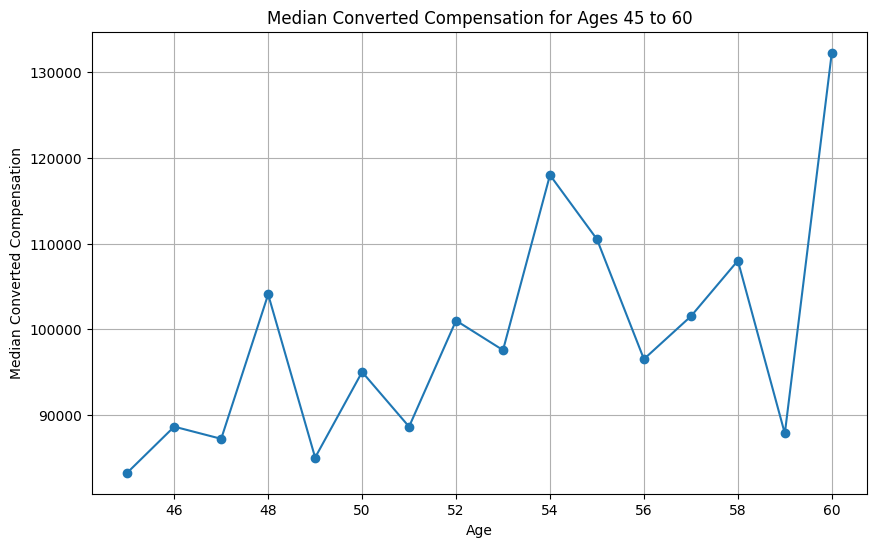

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Age'], df['MedianConvertedComp'], marker='o', linestyle='-')
plt.title('Median Converted Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()

In [ ]:
### Bar Chart

In [ ]:
query = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
ORDER BY Count DESC;
"""

# Assuming 'conn' is your connection to the SQLite database
df = pd.read_sql_query(query, conn)
print(df)

                                          MainBranch  Count
0                     I am a developer by profession  10618
1  I am not primarily a developer, but I write co...    780


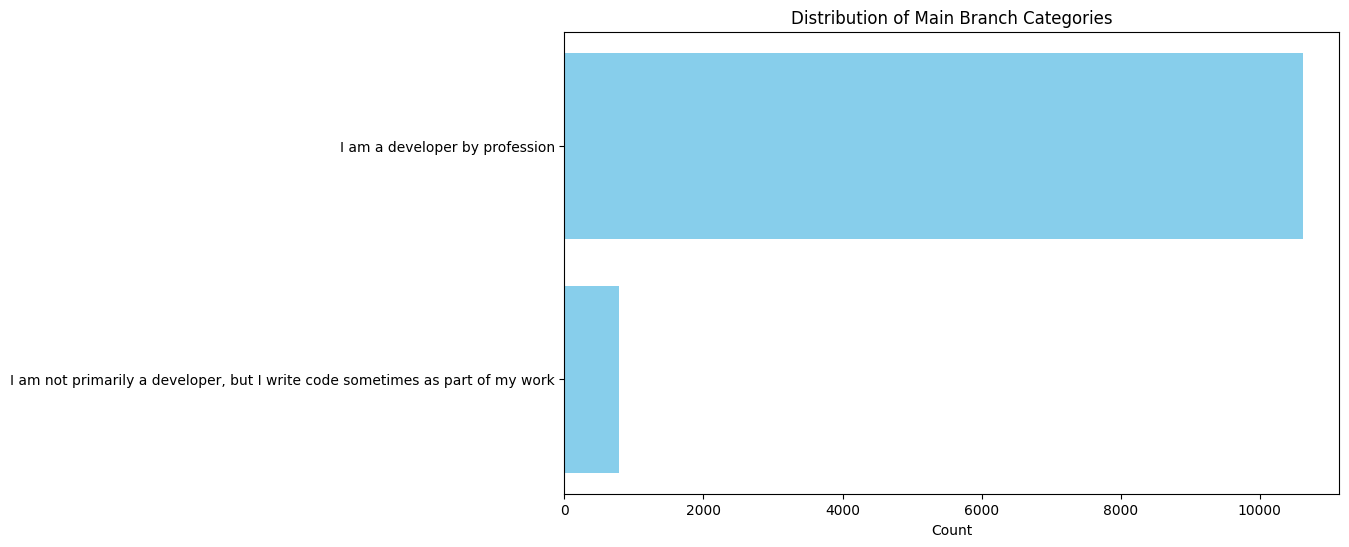

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Main Branch Categories')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

In [ ]:
conn.close()